In [33]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
us_arrests_df = pd.read_csv("UsArrests.csv")
us_arrests_df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


Handle rows with no data

In [3]:
# Display the amount of empty rows in each column
us_arrests_df.isnull().sum()

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

All the columns in the dataset above has been populated. 

Check what data types are in the dataset. This is to avoid any issues when having to conduct analysis on the dataset. 

In [4]:
us_arrests_df.dtypes

City         object
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

I will be converting all numeric calues (Murder, Assault, UrbanPop and Rape columns) into float64. This is to ensure uniformity accross all the data in the dataset.

In [5]:
us_arrests_df["Assault"] = us_arrests_df["Assault"].astype("float64")
us_arrests_df["UrbanPop"] = us_arrests_df["UrbanPop"].astype("float64")
us_arrests_df.dtypes

City         object
Murder      float64
Assault     float64
UrbanPop    float64
Rape        float64
dtype: object

Now we will be visualizing the data. 

We will first start off by displaying each crime and how often it happens in each city mentioned in the dataset.

In [6]:
city_urbanpop = us_arrests_df.groupby("City")["UrbanPop"].max()
sorted_city_urbabpop = city_urbanpop.sort_values(ascending=False)
sorted_city_urbabpop.head()

city_murder = us_arrests_df.groupby("City")["Murder"].max()
sorted_city_murder = city_murder.sort_values(ascending=False)
sorted_city_murder.head()

city_assault = us_arrests_df.groupby("City")["Assault"].max()
sorted_city_assault = city_assault.sort_values(ascending=False)
sorted_city_assault.head()

city_rape = us_arrests_df.groupby("City")["Rape"].max()
sorted_city_rape = city_rape.sort_values(ascending=False)
sorted_city_rape.head()

City
Nevada        46.0
Alaska        44.5
California    40.6
Colorado      38.7
Michigan      35.1
Name: Rape, dtype: float64

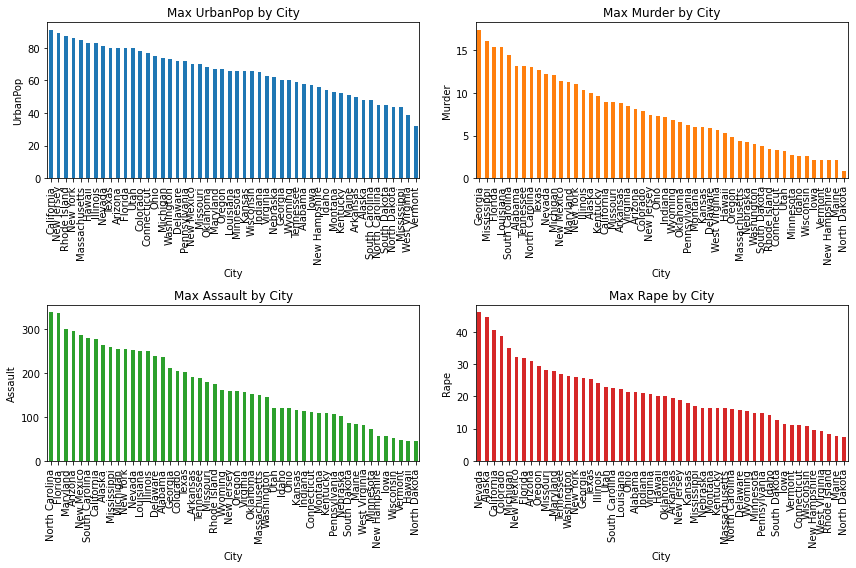

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
ax0, ax1, ax2, ax3 = axes.flatten()

sorted_city_urbabpop.plot(kind='bar', ax=ax0, color='C0')
ax0.set_title('Max UrbanPop by City')
ax0.set_xlabel('City')
ax0.set_ylabel('UrbanPop')

sorted_city_murder.plot(kind='bar', ax=ax1, color='C1')
ax1.set_title('Max Murder by City')
ax1.set_xlabel('City')
ax1.set_ylabel('Murder')

sorted_city_assault.plot(kind='bar', ax=ax2, color='C2')
ax2.set_title('Max Assault by City')
ax2.set_xlabel('City')
ax2.set_ylabel('Assault')

sorted_city_rape.plot(kind='bar', ax=ax3, color='C3')
ax3.set_title('Max Rape by City')
ax3.set_xlabel('City')
ax3.set_ylabel('Rape')

plt.tight_layout()
plt.show()

A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set.

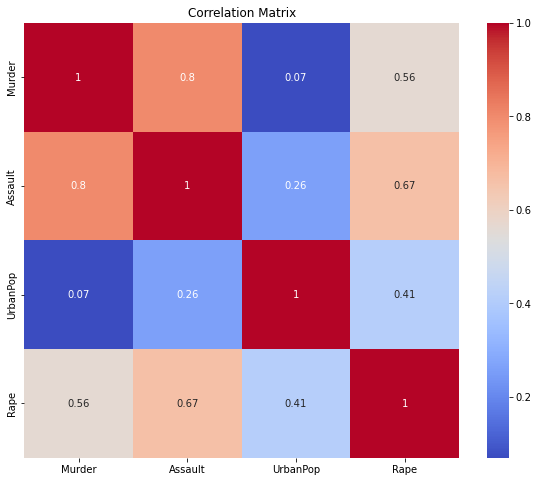

In [14]:
# Exclude the 'City' column from the correlation calculation
numeric_cols = us_arrests_df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

The two most correlated points in this dataset are Murder and Assault as well as Rape and Murder. 

A PCA or a Principal Component Analysis gives you a calculative way of eliminating a few extra less important variables, thereby maintaining the transparency of all information. This is achieved by finding the most common dimensions in a dataset and making them easier to identify. 

The first step in a PCA report is Standardization. 

The range of variables in the dataset is calculated and standardized to analyze the contribution of each variable equally.
Calculating the initial variables will assist in categorizing the variables that are dominating the other variables of small ranges.
This will assist in attaining biased results at the end of the analysis.

In [9]:
# Separate the features from the target variable
X = us_arrests_df.drop('City', axis=1)

In [10]:
# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [11]:
# Create a new DataFrame with the standardized features
us_arrests_std = pd.DataFrame(X_std, columns=X.columns)

# Add the City column back to the standardized DataFrame
us_arrests_std['City'] = us_arrests_df['City']

us_arrests_std.head()

,Murder,Assault,UrbanPop,Rape,City
0,1.255179,0.790787,-0.526195,-0.003451,Alabama
1,0.513019,1.118060,-1.224067,2.509424,Alaska
2,0.072361,1.493817,1.009122,1.053466,Arizona
3,0.234708,0.233212,-1.084492,-0.186794,Arkansas
4,0.281093,1.275635,1.776781,2.088814,California


If a standardized value is -1, it means that the original value is one standard deviation below the mean. Similarly, a value of 0 indicates that the original value is at the mean, while a value of 1 signifies one standard deviation above the mean. A value of 2 means that the original value is two standard deviations above the mean.

The second step in the PCA is a Covariance Matrix Computation.

The covariance matrix provides information about the relationships and variability between variables. Positive covariances suggest a positive relationship, while negative covariances suggest a negative relationship. However, it is important to note that covariance alone does not indicate causation or the strength of the relationships. 

In [17]:
# Compute the covariance matrix
covariance_matrix = X.cov()
covariance_matrix.head()

,Murder,Assault,UrbanPop,Rape
Murder,18.970465,291.062367,4.386204,22.991412
Assault,291.062367,6945.165714,312.275102,519.269061
UrbanPop,4.386204,312.275102,209.518776,55.768082
Rape,22.991412,519.269061,55.768082,87.729159


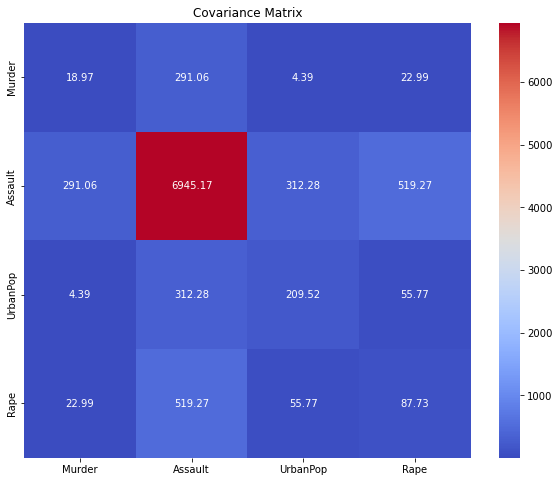

In [18]:
# Plot the covariance matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Covariance Matrix')
plt.show()

The top two highest covariances in this dataset are Assault and Murder as well as Rape and Assault. This suggests that as the rates of assaults goes up so do the rates of rape and murder. 

The next step in the PCA is to compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components. 

The eigenvalue represents the amount of variance explained by that component, and the eigenvector represents the weights or coefficients of the original variables in that component.

By analyzing the eigenvalues, you can determine the significance of each principal component. The components with higher eigenvalues capture more variance and are considered more important in explaining the data's variability.

In [21]:
# Compute the eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Print the eigenvalues and eigenvectors
for i in range(len(sorted_eigenvalues)):
    print("Principal Component", i+1)
    print("Eigenvalue:", sorted_eigenvalues[i])
    print("Eigenvector:", sorted_eigenvectors[:, i])
    print()

Principal Component 1
Eigenvalue: 7011.114851023601
Eigenvector: [0.04170432 0.99522128 0.04633575 0.0751555 ]

Principal Component 2
Eigenvalue: 201.99236632261338
Eigenvector: [ 0.04482166  0.05876003 -0.97685748 -0.20071807]

Principal Component 3
Eigenvalue: 42.11265075533886
Eigenvector: [ 0.07989066 -0.06756974 -0.20054629  0.97408059]

Principal Component 4
Eigenvalue: 6.164246184163148
Eigenvector: [-0.99492173  0.0389383  -0.05816914  0.07232502]



The last step is to recast the data along the principal components axis

In [26]:
# Select the desired number of principal components
num_components = 2
selected_eigenvectors = sorted_eigenvectors[:, :num_components]

# Recast the data along the principal component axes
recasted_data = us_arrests_std.drop('City', axis=1).dot(selected_eigenvectors)

recasted_data['City'] = us_arrests_std['City']
recasted_data.head()

,0,1,City
0,0.814714,0.617436,Alabama
1,1.265991,0.780744,Alaska
2,1.615628,-1.106198,Arizona
3,0.177596,1.121111,Arkansas
4,1.520576,-2.067369,California


You are also required to do an application of two clustering techniques and an analysis of the clusters they generate. 

The first model will be a k-means clustering model. The model partitions the data into a pre-defined number of clusters. 

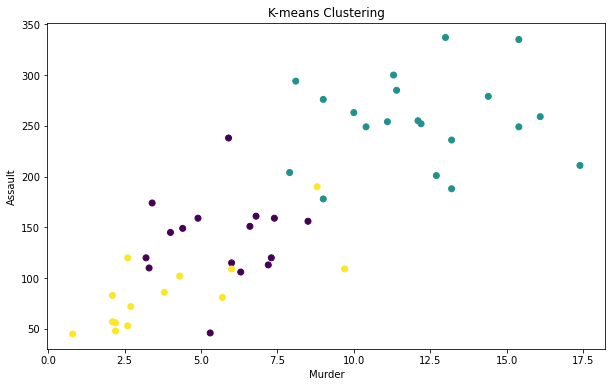

In [32]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_std)

# Assign cluster labels to the data points
labels = kmeans.labels_

# Add cluster labels to the DataFrame
us_arrests_df['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(us_arrests_df['Murder'], us_arrests_df['Assault'], c=us_arrests_df['Cluster'], cmap='viridis')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.title('K-means Clustering')
plt.show()

The clusters in this model have been successfully separated into distinct clusters based on the 'Murder' and 'Assault' variables. Each cluster is represented by a different color in the plot.

The clusters appear to have different patterns and densities. Some clusters are more densely packed, indicating higher similarity among the data points within those clusters, while other clusters have more scattered data points.

There are very little data points that are far from their cluster centers, appearing as outliers.

The next clustering technique is hierarchical clustering. The dendrogram helps us understand the hierarchical structure of the clusters. We can observe the distances between clusters and identify the cutoff point to determine the number of clusters.

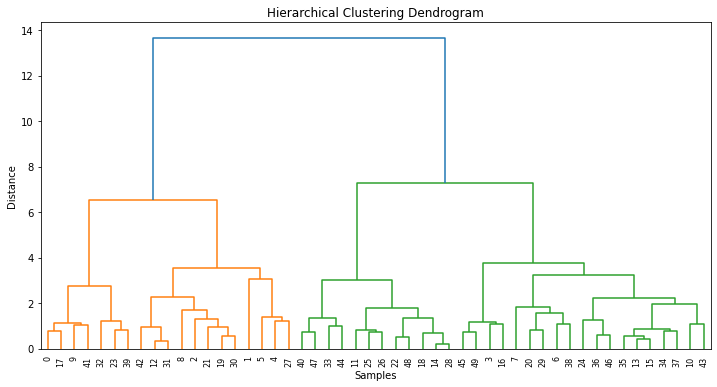

In [34]:
# Compute the linkage matrix
linkage_matrix = linkage(X_std, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

The dendrogram shows the hierarchical structure of the clusters. The longer the vertical lines, the further the clusters are from each other in terms of dissimilarity. The shorter lines represent clusters that are more similar to each other.

Similar to the K-means clustering model the specific data points are well distinguished from each other. 